[volver](main.ipynb)

# Fase 2: Comprensión de los Datos

## Recopilación de Datos Iniciales

Primero, cargamos el conjunto de datos weatherAUS y observamos sus características básicas.

In [25]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore') # apagamos los warnigs


# Cargar el conjunto de datos
weather_df = pd.read_csv('weatherAUS.csv')

# Mostrar las primeras filas del conjunto de datos
weather_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


**Análisis Inicial:** Visualizamos las primeras filas del conjunto de datos para entender su estructura y contenido.

## Descripción de los Datos

Obtenemos una descripción estadística de las variables que nos interesan:

In [26]:
# Descripción estadística de las variables relevantes
variables_interes = ['WindGustSpeed', 'WindGustDir', 'WindSpeed9am', 'WindSpeed3pm', 
                     'WindDir9am', 'WindDir3pm', 'Humidity9am', 'Humidity3pm', 
                     'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 
                     'Rainfall', 'RainToday', 'RainTomorrow']
weather_df[variables_interes].describe(include='all')


,WindGustSpeed,WindGustDir,WindSpeed9am,WindSpeed3pm,WindDir9am,WindDir3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Rainfall,RainToday,RainTomorrow
count,132923.000000,132863,140845.000000,139563.000000,132180,138415,140419.000000,138583.000000,128179.000000,128212.000000,141289.000000,139467.000000,140787.000000,140787,142193
unique,NaN,16,NaN,NaN,16,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,NaN,W,NaN,NaN,N,SE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
freq,NaN,9780,NaN,NaN,11393,10663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109332,110316
mean,39.984292,NaN,14.001988,18.637576,NaN,NaN,68.843810,51.482606,1017.653758,1015.258204,16.987509,21.687235,2.349974,NaN,NaN
std,13.588801,NaN,8.893337,8.803345,NaN,NaN,19.051293,20.797772,7.105476,7.036677,6.492838,6.937594,8.465173,NaN,NaN
min,6.000000,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,980.500000,977.100000,-7.200000,-5.400000,0.000000,NaN,NaN
25%,31.000000,NaN,7.000000,13.000000,NaN,NaN,57.000000,37.000000,1012.900000,1010.400000,12.300000,16.600000,0.000000,NaN,NaN
50%,39.000000,NaN,13.000000,19.000000,NaN,NaN,70.000000,52.000000,1017.600000,1015.200000,16.700000,21.100000,0.000000,NaN,NaN
75%,48.000000,NaN,19.000000,24.000000,NaN,NaN,83.000000,66.000000,1022.400000,1020.000000,21.600000,26.400000,0.800000,NaN,NaN


**Análisis:** La descripción estadística incluye medidas como la media, la desviación estándar, los valores mínimos y máximos, y los percentiles para las variables numéricas. También se incluye la frecuencia y los valores únicos para las variables categóricas.

## Exploración de los Datos

Realizamos una exploración más profunda de los datos mediante visualizaciones para identificar patrones y relaciones entre las variables.

### Distribución de la Velocidad del Viento

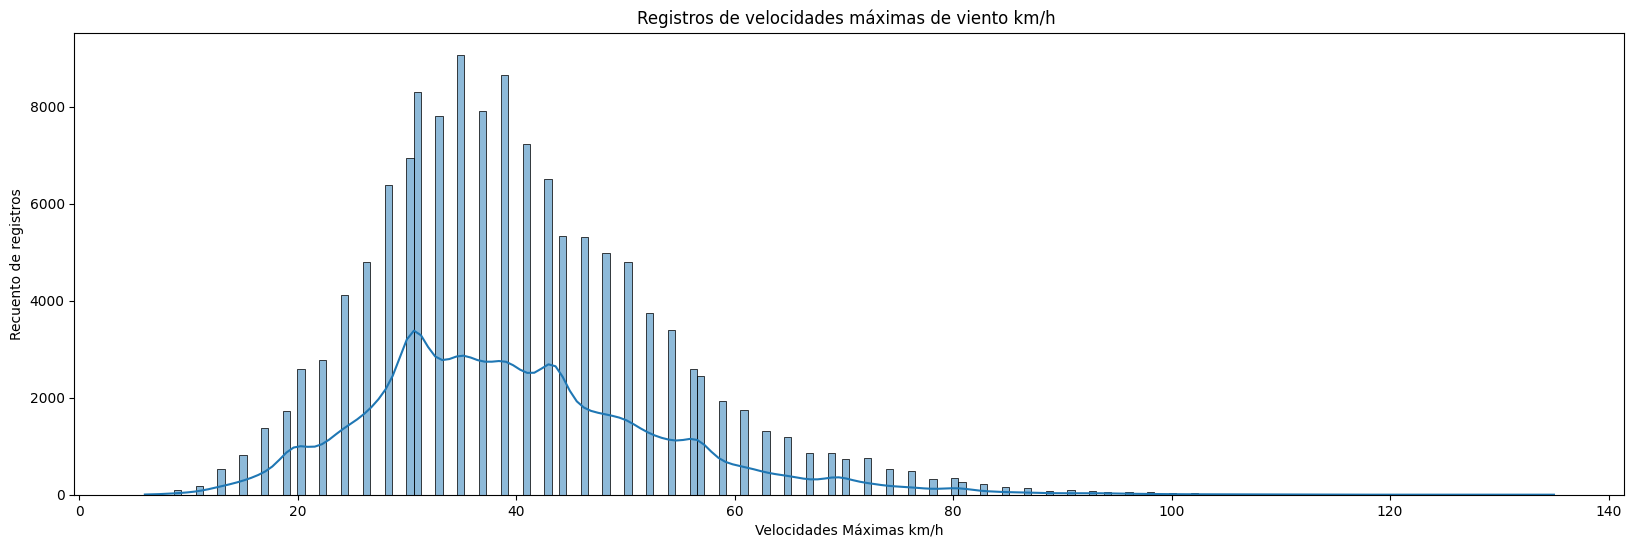

In [27]:
plt.title('Registros de velocidades máximas de viento km/h ')
plt.xlabel('Velocidades Máximas km/h')
plt.ylabel('Recuento de registros')
plt.rcParams["figure.figsize"] = (20, 6)
sns.histplot(weather_df['WindGustSpeed'], kde=True)
plt.show()

**Análisis:** Visualizamos la distribución de la velocidad de las ráfagas de viento para entender su variabilidad y frecuencia.

### Frecuencia de las Direcciones del Viento

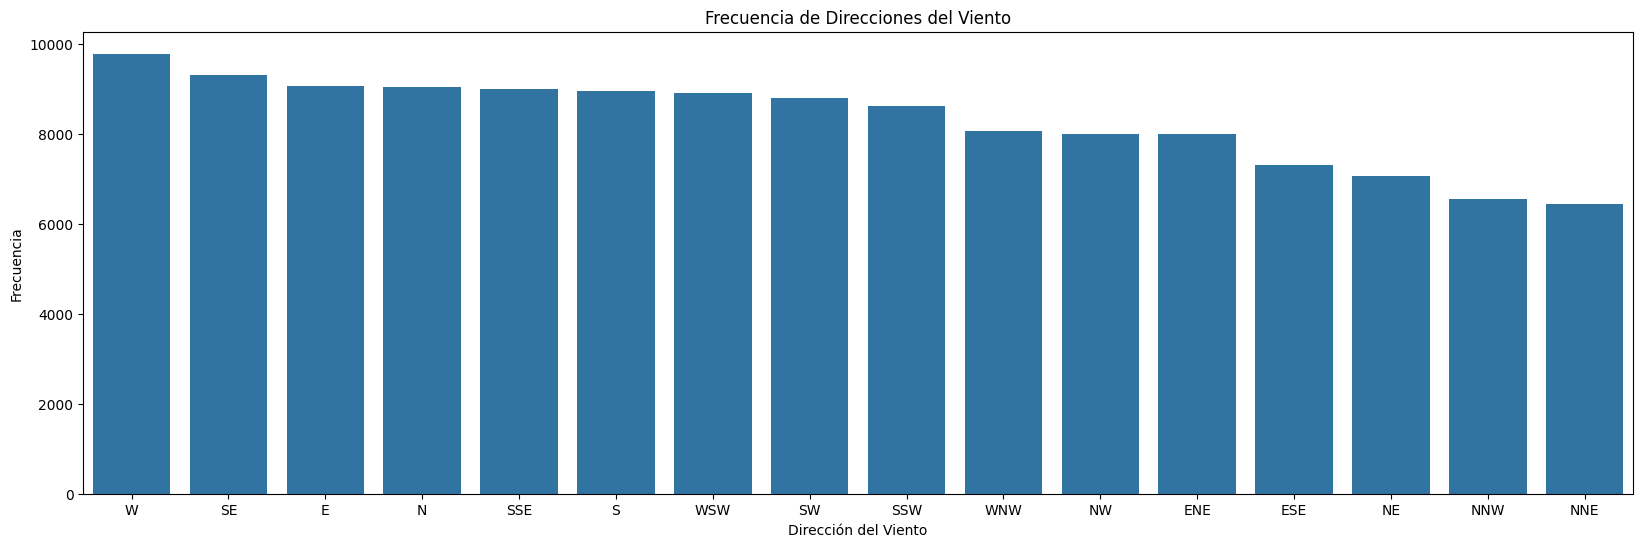

In [28]:
# Contamos las direcciones del viento
wind_direction_counts = weather_df['WindGustDir'].value_counts()

# Gráfico de barras de la dirección del viento


sns.barplot(x=wind_direction_counts.index, y=wind_direction_counts.values)
plt.title('Frecuencia de Direcciones del Viento')
plt.xlabel('Dirección del Viento')
plt.ylabel('Frecuencia')
plt.show()

**Análisis:** Visualizamos la frecuencia de cada dirección del viento para identificar las direcciones predominantes.



### Registros por Ubicación de las Direcciones del Viento

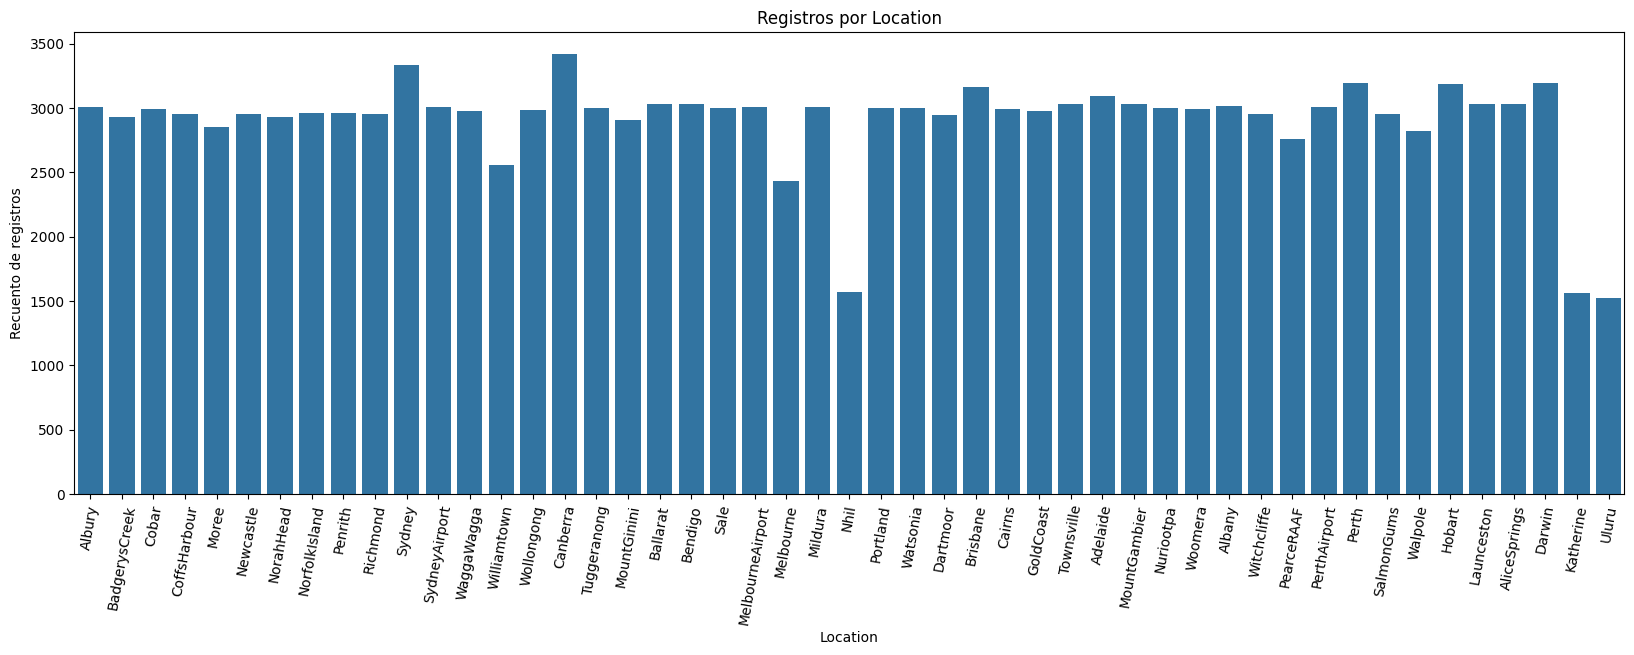

In [37]:
plt.title('Registros por Location')
plt.xlabel('Location')
plt.ylabel('Recuento de registros')
plt.xticks(rotation=80)
sns.countplot(x='Location', data=weather_df)
plt.show()

**Análisis:** Visualizamos la cantida de registros por ubicación para identificar en donde se concentra la mayor cantidad de registros

### Geo Referencia

In [41]:
from geopy.geocoders import Nominatim

# DataFrame para almacenar las ubicaciones y la cantidad de registros por cada Location

dfLocationCount = weather_df["Location"].value_counts().reset_index()
dfLocationCount.columns = ['Location','Count']
dfLocationCount['Location'] = dfLocationCount['Location']

# Función para obtener las coordenadas de latitud y longitud
def obtener_lat_long(ubicacion):
    geolocalizador = Nominatim(user_agent="nombre_de_usuario")
    ubicacion = geolocalizador.geocode('Australia, '+ubicacion)
    if ubicacion:
        return ubicacion.latitude, ubicacion.longitude
    else:
        return None, None

# Aplicar la función a cada fila de la columna 'Location'
dfLocationCount['Latitude'], dfLocationCount['Longitude'] = zip(*dfLocationCount['Location'].apply(obtener_lat_long))

# Eliminar location que no encontramos latitud y longitud
dfLocationCount = dfLocationCount.dropna()

In [42]:
dfLocationCount

,Location,Count,Latitude,Longitude
0,Canberra,3418,-35.297591,149.101268
1,Sydney,3337,-33.869844,151.208285
2,Perth,3193,-31.955893,115.860585
3,Darwin,3192,-12.460440,130.841047
4,Hobart,3188,-42.882509,147.328123
5,Brisbane,3161,-27.468968,153.023499
6,Adelaide,3090,-34.928181,138.599931
7,Bendigo,3034,-36.759018,144.282672
8,Townsville,3033,-19.256939,146.823954
11,Launceston,3028,-41.434081,147.137350


### Mapa

In [44]:
import folium

map = folium.Map(location=[-25.2744, 133.7751],zoom_start=5)

for _, row in dfLocationCount.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Location'],
        icon=folium.Icon('blue', icon='info-sign')

    ).add_to(map)

map.save('./html/location-georeferenciadas.html')


![mapa](./img/location-georeferenciadas.png)

**Análisis**: el [mapa interactivo](/html/location-georeferenciadas.html) se puede queda almacenado en el directorio /html

### Ciudades Costeras y No Costeras

1. Cargar el shapefile de las líneas costeras
1. Crear una columna con la geometría de los puntos
1. Convertir el DataFrame a un GeoDataFrame y asignar un CRS (si no está definido)
1. Verificar que los GeoDataFrames tengan el mismo CRS
1. Reproyectar ambos GeoDataFrames a un CRS proyectado adecuado (por ejemplo, EPSG:3857, que es un CRS métrico)
1. Crear una columna para verificar si la ciudad es costera. validamos si tiene una distancia menor a 10.000 metros (10 kilometros)
1. Guardamos GeoDataFrame con las ubicaciones y sus metadatos (latitud, longitud y cantidad de registros)
1. Crear copia del geo dataframe
1. Separar en ciudades costeras y no costeras

In [48]:
import geopandas as gpd
from shapely.geometry import Point

# 1
coastlines = gpd.read_file('./lib/natural-earth-vector/10m_physical/ne_110m_coastline.shp')
# 2
dfLocationCount['Coordinates'] = list(zip(dfLocationCount['Longitude'], dfLocationCount['Latitude']))
dfLocationCount['Coordinates'] = dfLocationCount['Coordinates'].apply(Point)

# 3
gdf = gpd.GeoDataFrame(dfLocationCount, geometry='Coordinates')

# 4
if coastlines.crs is None:
    coastlines.set_crs(epsg=4326, inplace=True)  # EPSG 4326 es WGS84, un CRS común para coordenadas geográficas

if gdf.crs is None:
    gdf.set_crs(epsg=4326, inplace=True)  # Asignar EPSG 4326 si no está definido

# 5
coastlines = coastlines.to_crs(epsg=3857)
gdf = gdf.to_crs(epsg=3857)

# 6
gdf['Is_Coastal'] = gdf['Coordinates'].apply(lambda point: coastlines.distance(point).min() < 10000)

# 7
gdf.to_csv('weatherAUS-fase-02-with-georef.csv',index=False)

# 8
dfLocations = gdf.copy()

# 9
ciudades_si_costeras = dfLocations.query('Is_Coastal == True')
ciudades_no_costeras = dfLocations.query('Is_Coastal == False')


In [52]:
ciudades_si_costeras

,Location,Count,Latitude,Longitude,Coordinates,Is_Coastal
1,Sydney,3337,-33.869844,151.208285,POINT (16832429.268 -4011338.603),True
3,Darwin,3192,-12.460440,130.841047,POINT (14565158.716 -1398154.814),True
8,Townsville,3033,-19.256939,146.823954,POINT (16344367.762 -2185209.811),True
13,Albany,3016,-35.024782,117.883608,POINT (13122743.215 -4167249.456),True
23,Portland,2996,-38.345623,141.604230,POINT (15763310.822 -4628366.48),True
25,Cairns,2988,-16.920666,145.772185,POINT (16227285.451 -1911592.013),True
27,Wollongong,2983,-34.427808,150.893054,POINT (16797337.936 -4086391.907),True
33,Newcastle,2955,-32.919295,151.779535,POINT (16896020.527 -3884596.657),True
35,Witchcliffe,2952,-34.026335,115.100477,POINT (12812926.467 -4032338.695),True
42,Walpole,2819,-34.977680,116.731006,POINT (12994436.181 -4160848.304),True


In [50]:
import folium

map = folium.Map(location=[-25.2744, 133.7751],zoom_start=5)

for _, row in ciudades_si_costeras.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Location'],
        icon=folium.Icon('blue', icon='info-sign')

    ).add_to(map)

map.save('./html/location-costeras-georeferenciadas.html')

![mapa](./img/location-costeras-georeferenciadas.png)

**Análisis** Identificamos las ciudades costeras para poder identificar con mayor precisión los datos de esas ciudades. el [mapa interactivo](html/location-costeras-georeferenciadas.html) se puede queda almacenado en el directorio /html/location-costeras-georeferenciadas.html




### Correlación entre Variables Climáticas y Velocidad del Viento

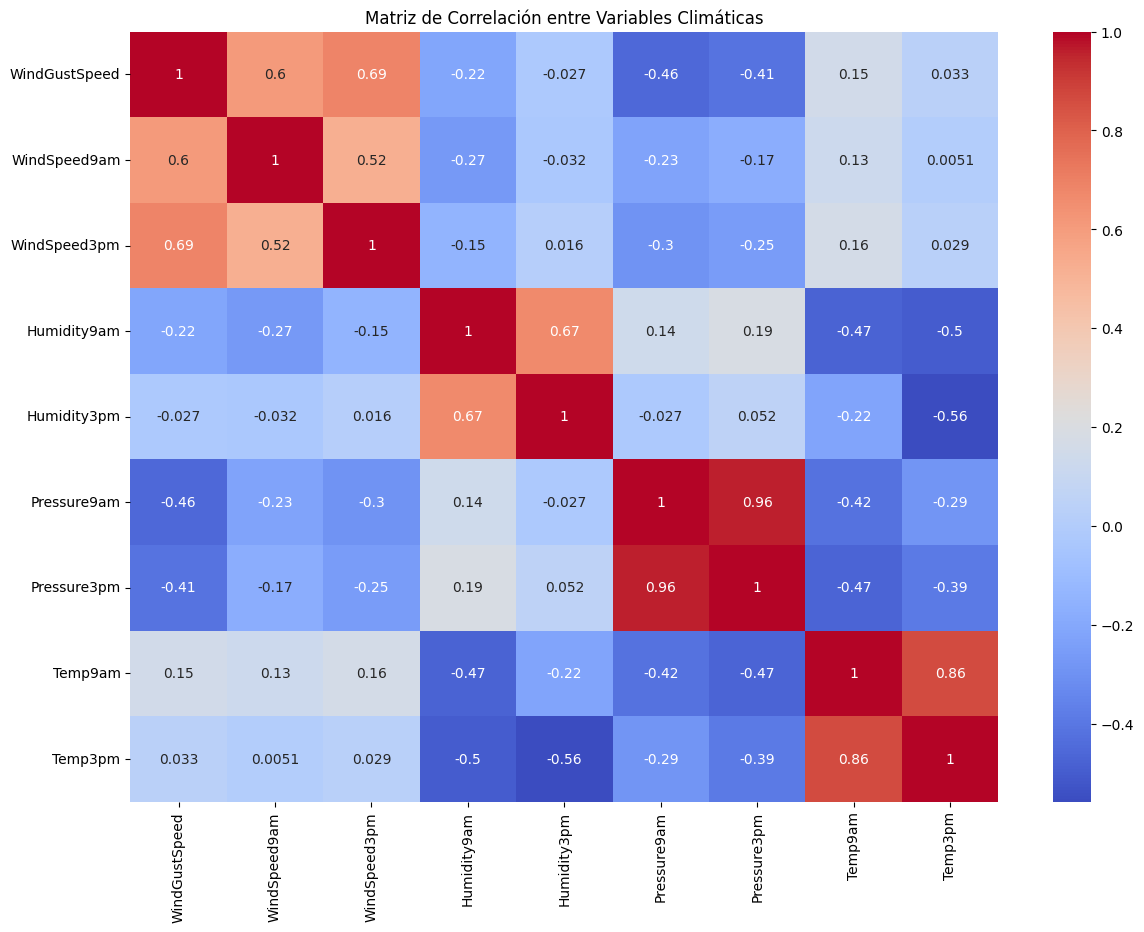

In [30]:
# Matriz de correlación
corr_matrix = weather_df[['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 
                          'Humidity9am', 'Humidity3pm', 'Pressure9am', 
                          'Pressure3pm', 'Temp9am', 'Temp3pm']].corr()

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación entre Variables Climáticas')
plt.show()

**Análisis:** La matriz de correlación nos permite identificar qué variables climáticas están más relacionadas con la velocidad del viento.

## Verificación de la Calidad de los Datos

### Detección de Valores Nulos

In [31]:
# Conteo de valores nulos
nulos = weather_df[variables_interes].isnull().sum()
nulos

WindGustSpeed     9270
WindGustDir       9330
WindSpeed9am      1348
WindSpeed3pm      2630
WindDir9am       10013
WindDir3pm        3778
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Temp9am            904
Temp3pm           2726
Rainfall          1406
RainToday         1406
RainTomorrow         0
dtype: int64

**Análisis:** Identificamos las columnas con valores nulos y la cantidad de datos faltantes en cada una de ellas.

### Tratamiento de Valores Nulos

In [32]:
# Eliminación de filas con valores nulos en variables críticas
weather_df_cleaned = weather_df.dropna(subset=['WindGustSpeed', 'WindGustDir'])

# Imputación de valores nulos en otras variables (por ejemplo, con la media)
weather_df_cleaned['WindSpeed9am'].fillna(weather_df_cleaned['WindSpeed9am'].mean(), inplace=True)
weather_df_cleaned['WindSpeed3pm'].fillna(weather_df_cleaned['WindSpeed3pm'].mean(), inplace=True)

# Verificación después de la imputación
weather_df_cleaned.isnull().sum()

Date                 0
Location             0
MinTemp            225
MaxTemp             56
Rainfall          1239
Evaporation      56398
Sunshine         62863
WindGustDir          0
WindGustSpeed        0
WindDir9am        7525
WindDir3pm         952
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am       1380
Humidity3pm       1862
Pressure9am      10258
Pressure3pm      10216
Cloud9am         52164
Cloud3pm         54227
Temp9am            587
Temp3pm           1045
RainToday         1239
RISK_MM              0
RainTomorrow         0
dtype: int64

**Análisis:** Tratamos los valores nulos eliminando filas con datos faltantes en variables críticas y imputando valores nulos en otras variables según sea necesario.

### Detección de Valores Atípicos

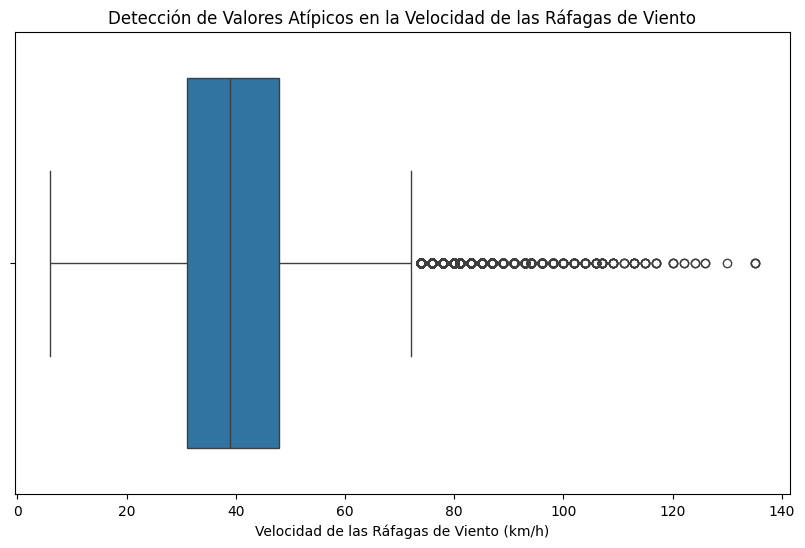

In [33]:
# Boxplot para detectar valores atípicos en la velocidad de las ráfagas de viento
plt.figure(figsize=(10, 6))
sns.boxplot(x=weather_df_cleaned['WindGustSpeed'])
plt.title('Detección de Valores Atípicos en la Velocidad de las Ráfagas de Viento')
plt.xlabel('Velocidad de las Ráfagas de Viento (km/h)')
plt.show()

**Análisis:** Utilizamos boxplots para detectar valores atípicos en las variables críticas, como la velocidad de las ráfagas de viento.

### Tratamiento de Valores Atípicos

In [34]:
# Eliminar de valores atípicos
Q1 = weather_df_cleaned['WindGustSpeed'].quantile(0.25)
Q3 = weather_df_cleaned['WindGustSpeed'].quantile(0.75)
IQR = Q3 - Q1
weather_df_cleaned = weather_df_cleaned[(weather_df_cleaned['WindGustSpeed'] >= (Q1 - 1.5 * IQR)) & 
                                        (weather_df_cleaned['WindGustSpeed'] <= (Q3 + 1.5 * IQR))]

# Verificación después de eliminar valores atípicos
weather_df_cleaned['WindGustSpeed'].describe()

count    129858.000000
mean         39.008609
std          12.050099
min           6.000000
25%          31.000000
50%          37.000000
75%          46.000000
max          72.000000
Name: WindGustSpeed, dtype: float64

In [35]:
# Guardar el DataFrame en un archivo CSV para usar en la fase 3
weather_df_cleaned.to_csv('weatherAUS-fase-02.csv', index=False)

**Análisis:** Eliminamos valores atípicos basados en el rango intercuartil (IQR) para mejorar la calidad del análisis.

## Resumen de la Comprensión de los Datos

### Estructura y Contenido de los Datos:

* Identificamos y describimos las variables críticas para deportes de viento.
* Exploramos y visualizamos la distribución de las variables relacionadas con el viento y otras condiciones climáticas.

### Calidad de los Datos:

* Identificamos y tratamos valores nulos y atípicos.
* Aseguramos que los datos estén listos para análisis más avanzados y modelado.

## Informe de Comprensión de los Datos

**Objetivo:** Entender las características y la calidad de los datos meteorológicos para deportes de viento.

### Descripción de los Datos:

* Variables relacionadas con el viento: Velocidad y dirección.
* Otras variables meteorológicas: Humedad, presión, temperatura, precipitación.

### Exploración de los Datos:

* Distribuciones de velocidad y dirección del viento.
* Correlaciones entre variables climáticas.

### Calidad de los Datos:

* Identificación y tratamiento de valores nulos y atípicos.

### Conclusión:

* Los datos están listos para la siguiente fase del proyecto, que incluye análisis más detallados y desarrollo de modelos predictivos